### MNIST 데이터 살펴보기

In [2]:
import sys
import tensorflow as tf
import numpy as np

In [3]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


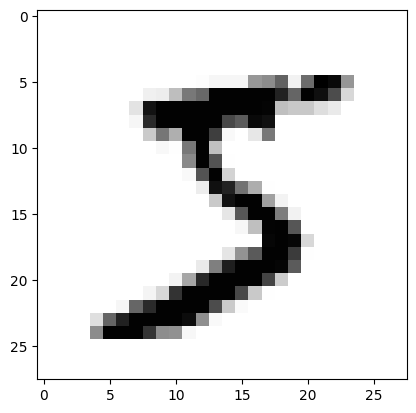

In [4]:
# MNIST 데이터를 시각화하기 
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

In [5]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


### MLP 구조 만들기

In [6]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape()을 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [7]:
print(f"Train Set : {X_train.shape}")
print(f"Test Set : {X_test.shape}")

Train Set : (60000, 784)
Test Set : (10000, 784)


In [8]:
# Label 값을 One-hot encoding 하기 
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [9]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Model 설계

In [10]:
# 모델 설계하기 
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

### MLP Model 학습하기

In [12]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

Epoch 1/30


48/48 [==============================] - 1s 11ms/step - loss: 17.3694 - categorical_accuracy: 0.7811 - val_loss: 1.2500 - val_categorical_accuracy: 0.9075
Epoch 2/30
48/48 [==============================] - 0s 9ms/step - loss: 0.8047 - categorical_accuracy: 0.9250 - val_loss: 0.7334 - val_categorical_accuracy: 0.9282
Epoch 3/30
48/48 [==============================] - 0s 9ms/step - loss: 0.3837 - categorical_accuracy: 0.9505 - val_loss: 0.6023 - val_categorical_accuracy: 0.9388
Epoch 4/30
48/48 [==============================] - 0s 9ms/step - loss: 0.2027 - categorical_accuracy: 0.9683 - val_loss: 0.5351 - val_categorical_accuracy: 0.9417
Epoch 5/30
48/48 [==============================] - 0s 8ms/step - loss: 0.1115 - categorical_accuracy: 0.9794 - val_loss: 0.5108 - val_categorical_accuracy: 0.9442
Epoch 6/30
48/48 [==============================] - 0s 8ms/step - loss: 0.0611 - categorical_accuracy: 0.9868 - val_loss: 0.4973 - val_categorical_accuracy: 0.9424
Epoch 7/30
4

In [13]:
# Training loss 확인하기
loss = history.history['loss']
val_loss = history.history['val_loss']

print(loss)
print(val_loss)

[17.36944007873535, 0.8047422766685486, 0.3836521804332733, 0.20274092257022858, 0.11146930605173111, 0.061073388904333115, 0.03231443092226982, 0.015152652747929096, 0.006933671422302723, 0.003376430831849575, 0.00140008341986686, 0.0008329266565851867, 0.0006072163814678788, 0.0004981343518011272, 0.0004424987710081041, 0.00039791406015865505, 0.0003630725550465286, 0.0003335570509079844, 0.00030821721884422004, 0.00028618224314413965, 0.0002664715575519949, 0.0002500393893569708, 0.0002346380933886394, 0.0002208238438470289, 0.00020787064568139613, 0.00019693939248099923, 0.00018650668789632618, 0.00017705827485769987, 0.00016784506442490965, 0.00015992582484614104]
[1.2499955892562866, 0.7334479093551636, 0.6023222208023071, 0.5350516438484192, 0.510835587978363, 0.49726423621177673, 0.4952939450740814, 0.48132002353668213, 0.4770313799381256, 0.4631611406803131, 0.46639615297317505, 0.46463334560394287, 0.4653271436691284, 0.4646417498588562, 0.46501484513282776, 0.464037269353866

### 학습된 모델 성능 확인하기

In [14]:
# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 0s 815us/step - loss: 0.4631 - categorical_accuracy: 0.9510

 Test Accuracy: 0.9510


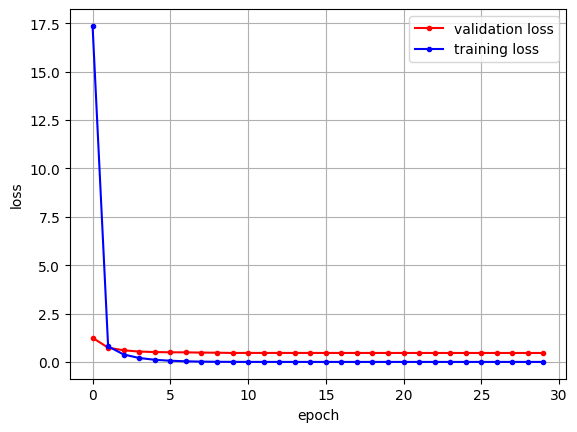

In [15]:
# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### MLP (Multi Layers Perceptron)의 한계를 코드로 확인하기

In [16]:
import cv2

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

0


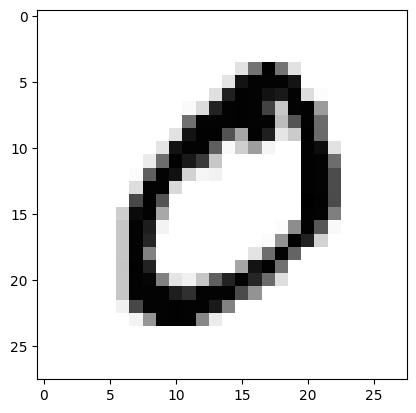

In [18]:
import matplotlib.pyplot as plt

print(y_train[1])
plt.imshow(X_train[1], cmap='Greys')
plt.show()

In [19]:
# 이미지 회전 변환 메트릭스 구하기
M = cv2.getRotationMatrix2D((20, 25), 20, 1)

# 이미지 이동 변환 메트릭스 구하기
M[0, 2] = M[0, 2] + 3
M[1, 2] = M[1, 2] + 3

# 이미지 변환 메트릭스 적용
test_image = cv2.warpAffine(X_train[5], M, (28, 28))

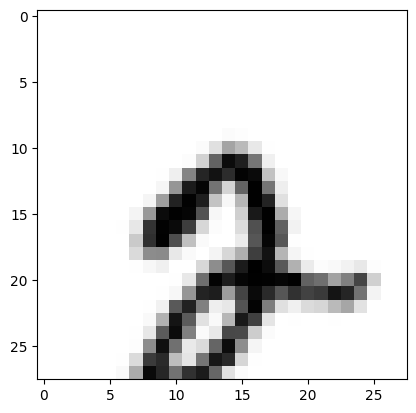

In [21]:
plt.imshow(test_image, cmap='Greys')

In [22]:
# MLP의 input 데이터를 넣어주기 위해 1x784 형태로 reshape하고 normalization
test_image_reshape = test_image.reshape(1, 784).astype('float64')

In [23]:
Y_prediction = model.predict(test_image_reshape)

1/1 [==============================] - 0s 56ms/step


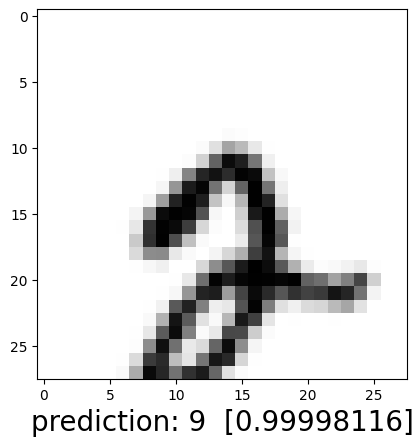

In [24]:
index = np.argmax(Y_prediction) # 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은 값을 가진 인덱스를 추출 
value = Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel("prediction: "+str(index)+"  " +str(value), fontsize=20)
plt.show()